<a href="https://colab.research.google.com/github/jonascesconetto/data_science/blob/main/Analisando_os_Dados_do_Airbnb_(Edinburgh_Scotland).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Edinburgh - Scotland

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Edinburgh, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados utilizados para essa análise foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o arquivo 'Summary':
* `listings.csv` - Summary information and metrics for listings in Rio de Janeiro (good for visualizations).

**Observação**
* O portal está em constante evolução, diante disto é interessante armazenar os dados em um repositório diferente para que a analise de dados se mantenha constante. 

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
# arquivos importados no diretórioo do ambiente colab são deletados quando a aplicação é reiniciada.
df = pd.read_csv("listings.csv")

## Pré análise
Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,Georgian Boutique Apt City Centre,60423,Charlotte,NaN,"Old Town, Princes Street and Leith Street",55.95759,-3.18805,Entire home/apt,100,3,345,2020-08-28,5.35,1,151
1,24288,"Cool central Loft, sleeps 4, 2 double bed+en-s...",46498,Gordon,NaN,"Canongate, Southside and Dumbiedykes",55.94383,-3.18445,Entire home/apt,95,3,219,2019-09-08,1.95,1,25
2,38628,Edinburgh Holiday Let,165635,Trish,NaN,Joppa,55.94215,-3.09640,Entire home/apt,55,4,57,2018-08-27,0.98,2,298
3,44009,"Very Spacious, Well Lit, Double Room, Very Cen...",192586,Puneet,NaN,Marchmont West,55.93800,-3.19468,Private room,45,2,38,2013-07-22,0.29,1,87
4,44552,Double room - spacious Leith flat,195950,Shaun,NaN,South Leith,55.96612,-3.17184,Private room,31,2,200,2019-09-12,1.68,2,75


## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência inicial e permitir um entendimento de como os dado estão estruturados.

**Dicionário das variáveis**

* `id` = número de referência do imóvel
* `name` - nome do imóvel anunciado
* `host_id` - id do proprietário do imóvel
* `neighbourhood_group` - não possui nenhum valor válido
* `latitude` - coordenada latitude da propriedade
* `longitude` - coordenada longitude da propriedade
* `room_type` - tipo do quarto ofertado
* `price` - preço do imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - números de reviews que a propriedade possui
* `last_review` - data do último review
* `review_per_month` - quantidade de review por mês
* **`calculated_host_listings_count`** - quantidade de imóvel do mesmo proprietário
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


### **Q1.** 
- Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? 
- Quais os tipos das variáveis?

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos de variáveis
print("Tipos de variáveis:")
display(df.dtypes)


Entradas:	 6634
Variáveis:	 16

Tipos de variáveis:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2.**  
- Qual a porcentagem de valores ausentes no *dataset*?

**Observações:**

- `A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valore nulos são significativos comparados aio total de entradas.`

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

neighbourhood_group               100.000000
reviews_per_month                  16.098885
last_review                        16.098885
host_name                           1.205909
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

**Considerações**
* Diante da listagem apresentada logo acima, fica evidente que a coluna `neighbourhood_group` possui 100% dos seus valores ausentes.
* As variáveis `reviews_per_month` e `last_review` possuem 16% de seus valores ausentes.
* A variável `host_name` apresentou 1,2% de valores ausentes.

### **Q3.** 
- Qual o tipo de distribuição das variáveis?

**Observações**

- Para facilitar a análise, será plotado o histograma com a distribuição das variáveis.

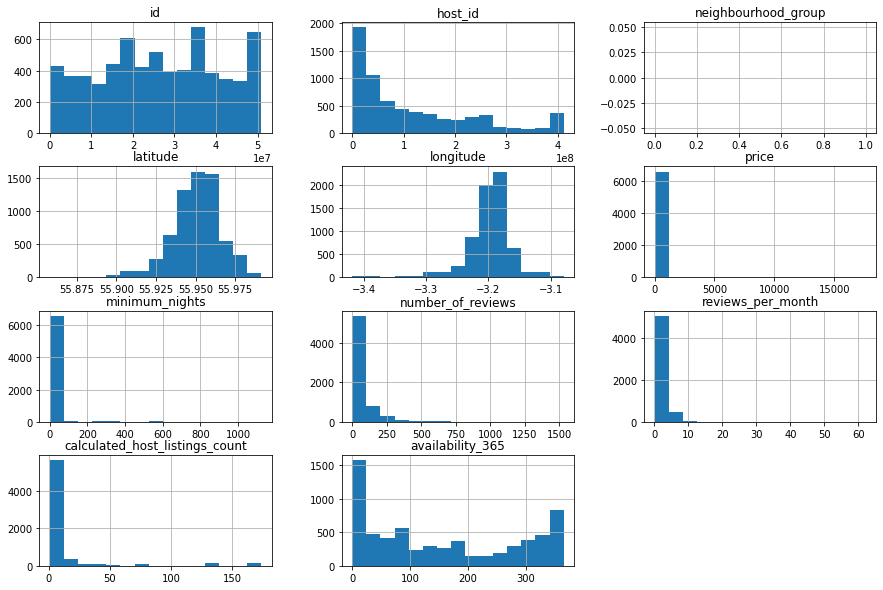

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));
# bins : int or sequence, default 10. Number of histogram bins to be used. If an integer is given, bins + 1.

**Considerações**
* Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Como é possível observar nas variáveis `price`, `minimum_nights` e `calculated_host_listings_count`. Os valores não seguem uma distribuição. e distorcem toda a representação gráfica.

### **Q4.**
- Há outliers presentes?

**Observações**
* Para verificação de outliers existem duas formas:
  * Resumo estatístico por meio do método `describe()`.
  * Plotar `boxplots` para a variável.

#### Resumo Estatístico

In [ ]:
# ver o resumo estatístico das variaveis númericas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6634.000000,6634.000000,6634.000000,5566.000000,6634.000000,6634.000000
mean,144.704402,4.853482,56.100844,1.701010,12.283087,155.290473
std,523.968883,33.740421,89.226018,2.222943,33.322392,131.474545
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,55.000000,1.000000,2.000000,0.370000,1.000000,29.000000
50%,85.000000,2.000000,19.000000,1.090000,2.000000,127.000000
75%,133.000000,3.000000,74.000000,2.410000,5.000000,293.000000
max,17626.000000,1124.000000,1532.000000,62.190000,174.000000,365.000000


**Consideraçoes**
Ao analisar o resumo estatístico, podemos tirar algumas hipóteses como:
- A variável `price` possui 75% do valor abaixo de `133,00`, porém o valor máximo é de `17.626,00`.
- A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

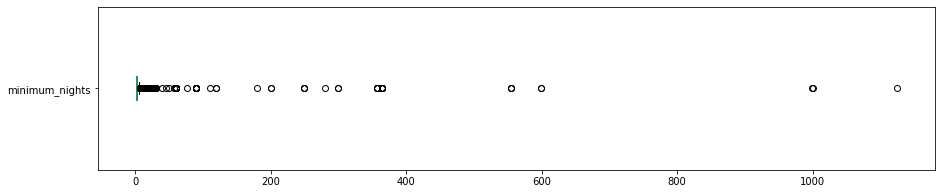

In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

In [ ]:
# valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30:
62 entradas
0.9346%


#### Boxplot para price

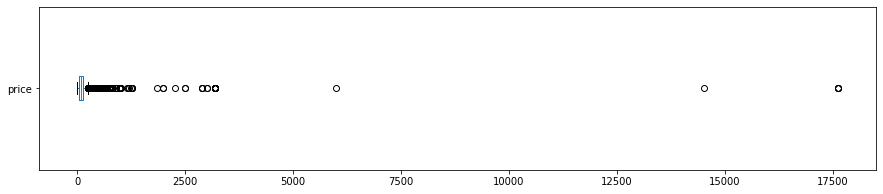

In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

In [ ]:
# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))


price: valores acima de 1500
36 entradas
0.5427%


#### Histograma sem `Outliers`
Já que identificamos outliers nas variáveis `price` e `minimum_nights`, vamos limpar o DataFrame delas para o histograma.

In [ ]:
# remover os "outliers" em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

In [ ]:
# remover 'neighbourhood_group', pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

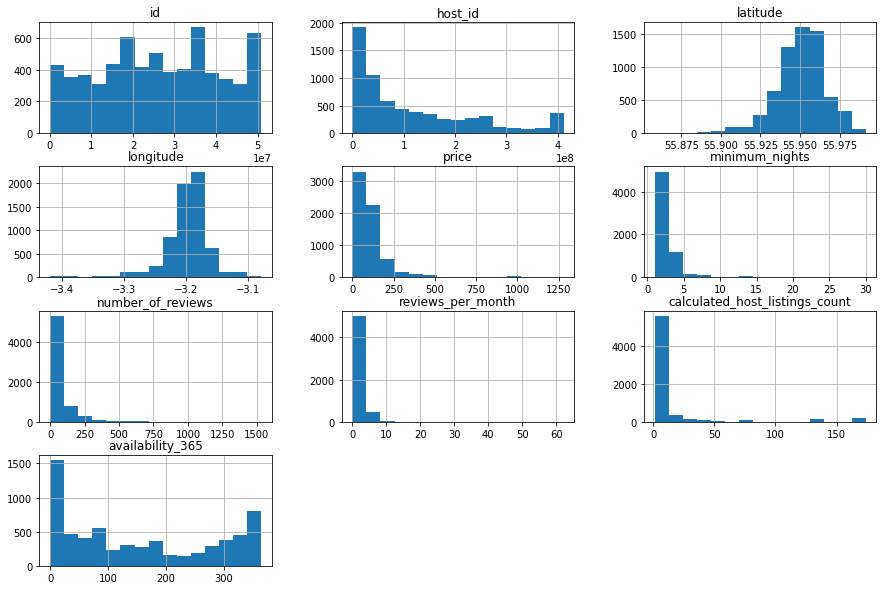

In [ ]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q5.**
- Qual a correlação existente entre as variáveis?

**Observações**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis. Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:
- Criar uma matriz de correlação
- Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

In [ ]:
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.030871,-0.107132,-0.092475,0.000347,0.134183
minimum_nights,-0.030871,1.000000,-0.036485,-0.082291,-0.043301,-0.049048
number_of_reviews,-0.107132,-0.036485,1.000000,0.667993,-0.032722,-0.007289
reviews_per_month,-0.092475,-0.082291,0.667993,1.000000,0.004239,0.008517
calculated_host_listings_count,0.000347,-0.043301,-0.032722,0.004239,1.000000,0.181039
availability_365,0.134183,-0.049048,-0.007289,0.008517,0.181039,1.000000


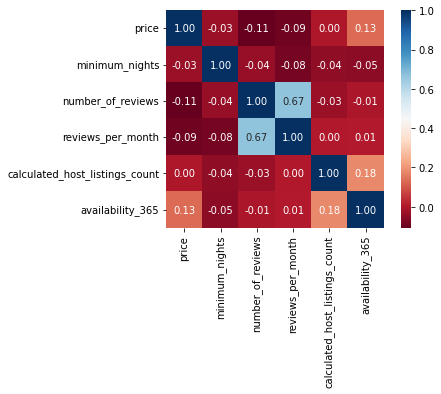

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6.**
- Qual o tipo de imóvel mais alugado no Airbnb?

**Observações**
A coluna da variável `room_type` indica o tipo de locaçào que está anunciada no Airbnb. Se você já alugou no site, sabe que existem diversas opções como: apartamentos, casas inteiras, apenas aluguel de quarto ou mesmo dividir o quarto com outras pessoas. Diantes disto, vamos identificar a quantidade de ocorrência para cada um dos tipos usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4333
Private room       2077
Hotel room          103
Shared room          25
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0] 

Entire home/apt    0.662741
Private room       0.317681
Hotel room         0.015754
Shared room        0.003824
Name: room_type, dtype: float64

### **Q7.**
- Qual a localidade mais cara do dataset?

**Observações**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
The Calders                           412.388889
South Leith                           195.877193
Dalmeny, Kirkliston and Newbridge     184.047619
Deans Village                         173.791237
New Town West                         171.614350
South Gyle                            168.444444
Balerno and Bonnington Village        162.444444
Canonmills and New Town North         155.112069
Murrayburn and Wester Hailes North    146.181818
Carrick Knowe                         142.000000
Name: price, dtype: float64

**Considerações**

Diante da falta de conhecimento do mercado imobiliário de Edinburgh foi necessário realizar uma pesquisa com intensão de conhecer um pouco mais da cidade, e identificar as localidades nas quais o valor do m2 é mais caro. Sendo assim, ficou evidente que a listagem que nos foi retornada com base em nosso `dataset` não retrata a realidade do mercado imobiliário da cidade. Embora ao realizar alguns testes com amostras não-representativas demonstrasse uma quantidade significativa considerando o total de amostras em nosso conjunto de dados.

In [ ]:
# ver quantidade de imóveis em Dalmeny, Kirkliston and Newbridge
print(df_clean[df_clean.neighbourhood == "Dalmeny, Kirkliston and Newbridge"].shape)

(21, 15)


**Considerações**

Como são fornecidads as Latitudes e Longitudes para os imóveis, é possivel plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

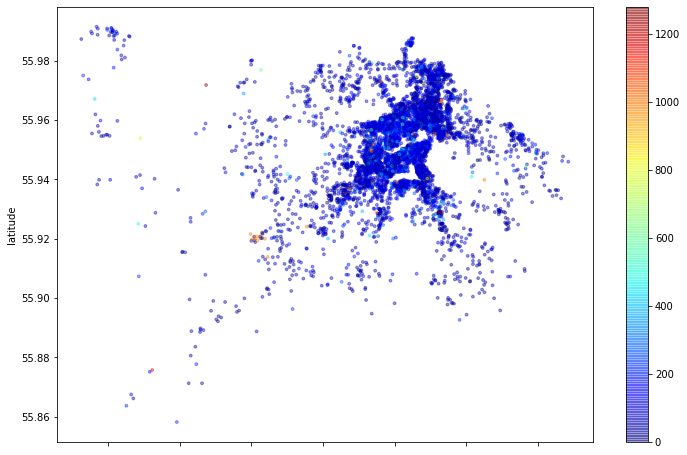

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8.** 
- Qual a média dos preços de aluguel?

In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

118.17742428877332

### **Q9.**
- Qual é a média do mínimo de noites para aluguel (minimum_nights)?

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.5015295197308047

## Conclusões


Diante do Dataset fornecidos pelo Airbnb foi realizado uma análise superficial dos dados, a qual nos permitiu observar a existência de *outliers* em algumas das variáveis. 

Por fim, levando em consideração a natureza resumida dos dados apresentados é interessante utiliza-lo para análise inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.